# Importing necesary versions and libraries

In [29]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns 
import plotly.graph_objs as go
import plotly.express as px

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Data exploration

iris dimensions are in cm

In [8]:
iris = pd.read_csv('iris.csv', names =['sepal_length','sepal_width','petal_length','petal_width','class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.shape

(150, 5)

In [13]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# Quick Visualization

Text(0.5, 1.0, 'Classes')

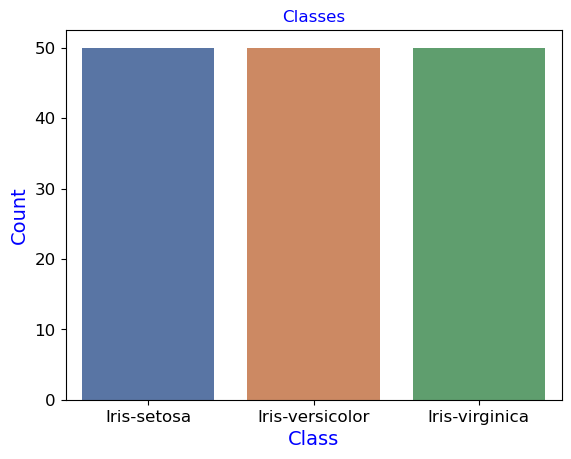

In [27]:
sns.countplot(data=iris, x='class', palette='deep')
plt.ylabel('Count', color='blue')
plt.xlabel('Class', color='blue')
plt.title('Classes', color='blue')

# Random Forests
### Will utilize a grid search to find optimum parameters to run a random forest classification

In [28]:
# Will load iris from sklearn for ease of grabbing the data and target features
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

#splitting iris into training and testing data
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.20, random_state=42)

# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Importing Grid Search
from sklearn.model_selection import GridSearchCV

#setting the parameters for the grid search
param_grid = {'max_depth':[1,2,3,4,5,8,18,32],
                 'n_estimators':[1, 25, 50, 100, 250, 500, 1000],
                 'min_samples_split':[2,3,4,5,8,12,16,20]}

# will utilize a random forest for the grid search
rf_clf = RandomForestClassifier(random_state=42)

# conducting grid search, using the random forest with three cross folds
grid_cv = GridSearchCV(rf_clf, param_grid, cv=3)

grid_cv.fit(X_train, y_train)

print('The best parameters are: ', grid_cv.best_params_)

The best parameters are:  {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [32]:
#running model using the best parameters from the grid search above
iris_rf_clf = RandomForestClassifier(max_depth=2, min_samples_split=2, n_estimators=50, random_state=42)

iris_rf_clf.fit(X_train, y_train)

y_pred = iris_rf_clf.predict(X_test)

In [33]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Not great. Model overfit the data, but it is a small dataset using the best parameters. Probably would not generalize well.

In [34]:
species_idx = iris_rf_clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

'versicolor'